In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection  import cross_val_score, StratifiedKFold
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [28]:
def fit_clf0(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)

    y_pred_test = clf.predict_proba(X_test)[:,1]
    plt.figure()
    thresholds = np.linspace(0.01, 1.00, 100)
    mcc = np.array([metrics.matthews_corrcoef(y_test, y_pred_test>thr) for thr in thresholds])
    plt.plot(thresholds, mcc)
    best_threshold = thresholds[mcc.argmax()]
    print("MCC: %f" % mcc.max())
    
    return clf, best_threshold


In [3]:
important_indices = pd.read_csv('important_indices.csv', index_col=0).iloc[:,0].values

In [5]:
important_indices

array([  0,   1,   8,   9,  10,  12,  13,  15,  21,  26,  35,  37,  38,
       394, 723, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735,
       736, 741, 743, 744, 755, 756, 757, 769, 771, 776, 780, 781, 784,
       786, 788, 792, 793, 798, 799, 803, 805, 810, 826, 827, 828, 829,
       830, 831, 832, 836, 838, 839, 843, 848, 850, 851, 854, 864, 866,
       872, 885], dtype=int64)

In [6]:
X = pd.read_csv("../input/train_numeric.csv", index_col=0, usecols=np.concatenate([[0], important_indices + 1]))

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [7]:
y = pd.read_csv("../input/train_numeric.csv", index_col=0, usecols=[0,969])

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [30]:
X2 = pd.DataFrame(X.index).floordiv(10000).add_suffix("_group")
X2['Id'] = X.index
X2 = X2.set_index('Id')
X2 = pd.concat([X, X2], axis=1)


In [27]:
X2

,L0_S0_F0,L0_S0_F2,L0_S0_F16,L0_S0_F18,L0_S0_F20,L0_S1_F24,L0_S1_F28,L0_S2_F36,L0_S2_F60,L0_S3_F80,...,L3_S30_F3829,L3_S32_F3850,L3_S33_F3857,L3_S33_F3859,L3_S33_F3865,L3_S35_F3889,L3_S35_F3896,L3_S36_F3920,L3_S38_F3960,Id_group
Id,,,,,,,,,,,,,,,,,,,,,
4,0.030,-0.034,0.020,0.083,-0.273,-0.271,0.167,-0.023,-0.223,NaN,...,0.005,NaN,-0.102,-0.048,0.026,-0.009,-0.022,NaN,NaN,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.049,NaN,-0.026,-0.210,-0.047,-0.011,-0.028,NaN,NaN,0
7,0.088,0.086,-0.225,-0.147,0.250,0.057,-0.079,0.011,-0.223,NaN,...,-0.069,NaN,0.191,0.236,0.108,-0.036,-0.091,NaN,NaN,0
9,-0.036,-0.064,-0.026,-0.046,-0.253,0.147,-0.007,0.120,0.050,NaN,...,-0.014,NaN,0.031,0.165,0.035,NaN,NaN,-0.030,NaN,0
11,-0.055,-0.086,-0.169,-0.099,0.042,-0.012,-0.046,NaN,NaN,0.037,...,-0.056,NaN,-0.049,0.147,-0.006,NaN,NaN,0.083,NaN,0
13,0.003,0.019,-0.005,-0.003,-0.035,-0.051,-0.074,NaN,NaN,-0.252,...,0.025,NaN,0.007,-0.221,-0.055,NaN,NaN,0.189,NaN,0
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.001,NaN,-0.001,-0.112,-0.055,-0.057,-0.145,NaN,NaN,0
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.036,NaN,-0.193,0.004,-0.006,-0.001,-0.002,NaN,NaN,0
18,-0.016,-0.041,-0.082,0.163,-0.220,0.001,-0.014,-0.101,-0.233,NaN,...,0.005,NaN,-0.006,-0.035,0.010,NaN,NaN,0.150,NaN,0


C:\Users\tmiya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


MCC: 0.191413


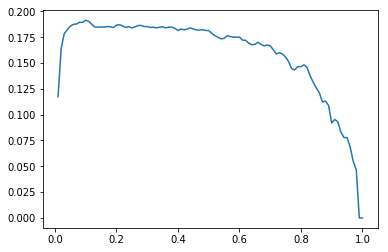

In [31]:
n = 800000
clf = XGBClassifier(max_depth=16, base_score=0.006)
[clf, best_threshold] = fit_clf0(clf, X2[0:n:2], y[0:n:2]['Response'], X2[1:n:2], y[1:n:2]['Response'])

In [35]:
X3 = X.rolling(10000, min_periods=1000).mean().add_suffix("_move_mean")
X3 = pd.concat([X, X3], axis=1)

In [37]:
X3

,L0_S0_F0,L0_S0_F2,L0_S0_F16,L0_S0_F18,L0_S0_F20,L0_S1_F24,L0_S1_F28,L0_S2_F36,L0_S2_F60,L0_S3_F80,...,L3_S30_F3809_move_mean,L3_S30_F3829_move_mean,L3_S32_F3850_move_mean,L3_S33_F3857_move_mean,L3_S33_F3859_move_mean,L3_S33_F3865_move_mean,L3_S35_F3889_move_mean,L3_S35_F3896_move_mean,L3_S36_F3920_move_mean,L3_S38_F3960_move_mean
Id,,,,,,,,,,,,,,,,,,,,,
4,0.030,-0.034,0.020,0.083,-0.273,-0.271,0.167,-0.023,-0.223,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.088,0.086,-0.225,-0.147,0.250,0.057,-0.079,0.011,-0.223,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-0.036,-0.064,-0.026,-0.046,-0.253,0.147,-0.007,0.120,0.050,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,-0.055,-0.086,-0.169,-0.099,0.042,-0.012,-0.046,NaN,NaN,0.037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0.003,0.019,-0.005,-0.003,-0.035,-0.051,-0.074,NaN,NaN,-0.252,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,-0.016,-0.041,-0.082,0.163,-0.220,0.001,-0.014,-0.101,-0.233,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\tmiya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


MCC: 0.168441


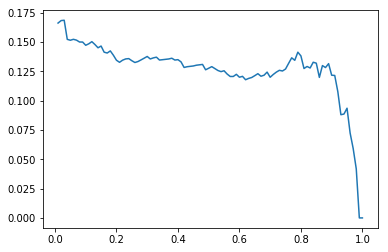

In [36]:
n = 200000
clf = XGBClassifier(max_depth=16, base_score=0.006)
[clf, best_threshold] = fit_clf0(clf, X3[0:n:2], y[0:n:2]['Response'], X3[1:n:2], y[1:n:2]['Response'])

In [10]:
best_threshold

0.32

In [9]:
X_test = pd.read_csv('../input/test_numeric.csv', index_col=0, usecols=np.concatenate([[0], important_indices + 1]))

NameError: name 'important_indices' is not defined

In [44]:
preds = (clf.predict_proba(X_test)[:,1] > best_threshold).astype(np.int8)
sub = pd.read_csv("../input/sample_submission.csv", index_col=0)
sub["Response"] = preds
sub.to_csv("submission.csv.gz", compression="gzip")

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
